# TITLE
#### Group 33 - Justin Gallant, Megan Lee, Jessy Lin 

Please correct spelling if I messed it up

### Introduction

Textbox

### Preliminary Exploratory Analysis

##### Loading in libraries

In [4]:
library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


##### Loading in the training Data

In [94]:
loaded_data <- read_excel("data/user_knowledge_data.xls", sheet = "Training_Data") |>
    select(STG:UNS)
training_data <- loaded_data[-1,]
training_data

New names:
• `` -> `...7`
• `` -> `...8`


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


There are currently six categories per observation.

##### Adding a Category that will create a ratio of the exam performances and a ratio of the studying priorities

In [95]:
training_data <- mutate(training_data, lpr_peg = LPR/PEG, str_stg = STR/STG) 
training_data

STG,SCG,STR,LPR,PEG,UNS,lpr_peg,str_stg
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
0.08,0.08,0.10,0.24,0.90,High,0.2666667,1.2500000
0.06,0.06,0.05,0.25,0.33,Low,0.7575758,0.8333333
0.10,0.10,0.15,0.65,0.30,Middle,2.1666667,1.5000000
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High,0.3766234,1.314815
0.50,0.75,0.81,0.61,0.26,Middle,2.3461538,1.620000
0.66,0.90,0.76,0.87,0.74,High,1.1756757,1.151515


##### Visualizing the Data

In [100]:
lpr_peg_plot <- ggplot(training_data, aes(x= LPR, y = PEG, colour = UNS)) +
    labs(x = "Exam performance for related objects with goal objects", 
         y = "Exam performance for goal objects", 
         colour = 'Knowledge Level') +
    geom_point(size = 2, alpha = 0.8)

str_peg_plot <- ggplot(training_data, aes(x= STR, y = PEG, colour = UNS)) +
    labs(x = "The degree of study time for related objects with goal object", 
         y = "Exam performance for goal objects", 
         colour = 'Knowledge Level') +
    geom_point(size = 2, alpha = 0.8)

ratio_lprpeg_plot <- ggplot(training_data, aes(x= str_stg, y = PEG, colour = UNS)) +
    labs(x = "Ratio of Studying Related Material to Studying Goal Material\nHigh Ratio Means Related Material was studied more", 
         y = "Exam performance for goal objects", 
         colour = 'Knowledge Level') +
    geom_point(size = 2, alpha = 0.8)

##### Comparing Exam Performance on Related Objects Vs. Exam Performance on Goal Objects.

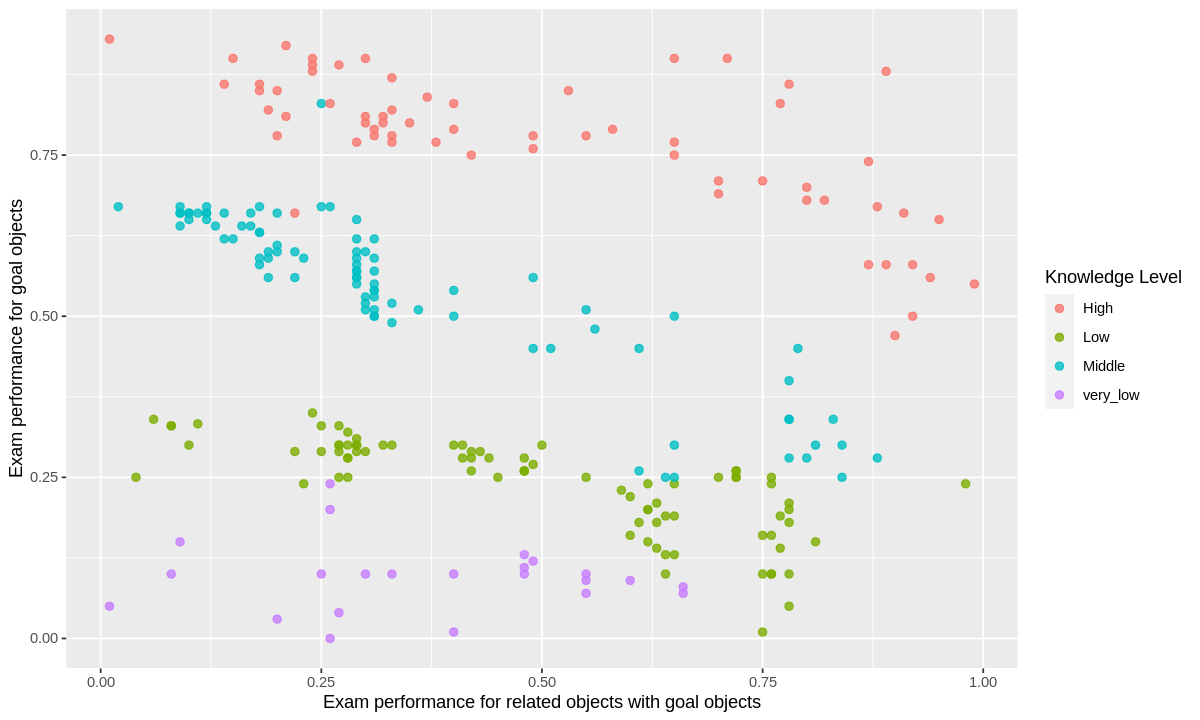

In [101]:
options(repr.plot.width=10, repr.plot.height=6)
lpr_peg_plot

This graph shows a trend that as the "Exam performance for related objects" increases, the "exam performance for goal objects" decreases slightly for all knowledge levels. Generally indicating that the exam performance for related objects increases, the exam performance for goal objects decreases. 

##### Comparing Study Time for Related Objects vs. Exam Performance for Goal Objects

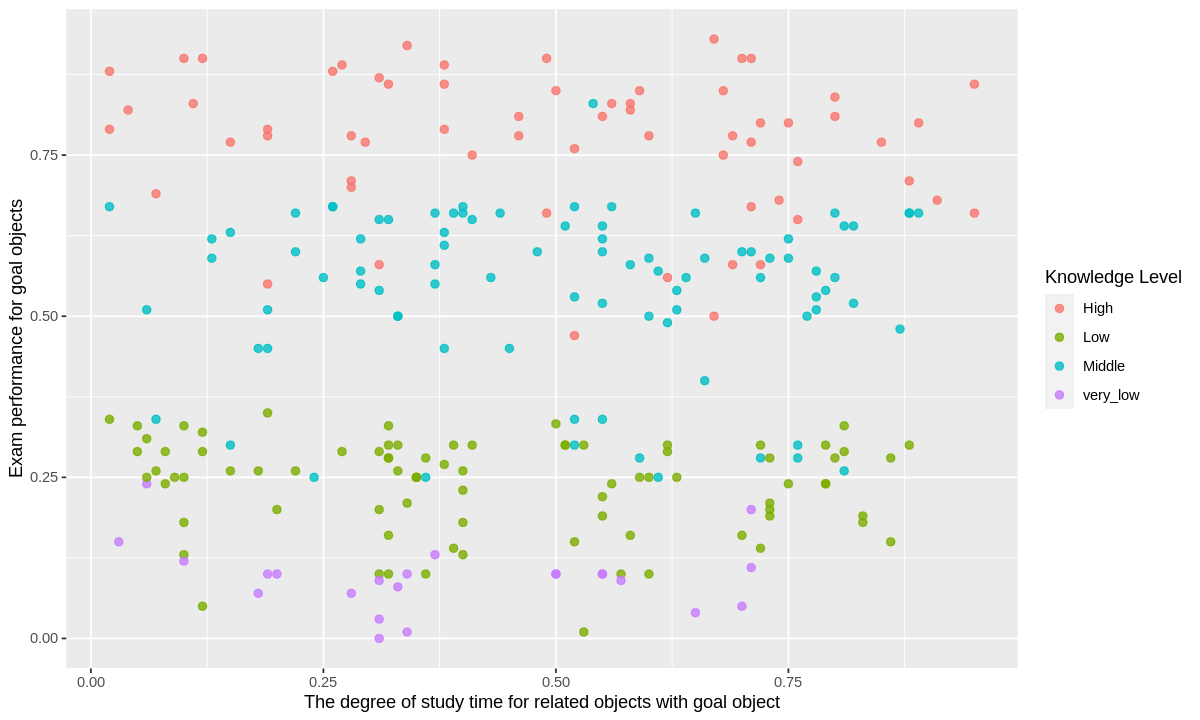

In [102]:
options(repr.plot.width=10, repr.plot.height=6)
str_peg_plot

This graph shows a trend that as the "Degree of study time for related objects" increases, the "exam performance for goal objects" does not change for all levels. Generally indicating that studying related material did not increase test scores on goal objects.

##### Comparing the Ratio of studying goal objects/related objects Vs. Exam performance on Goal Objects

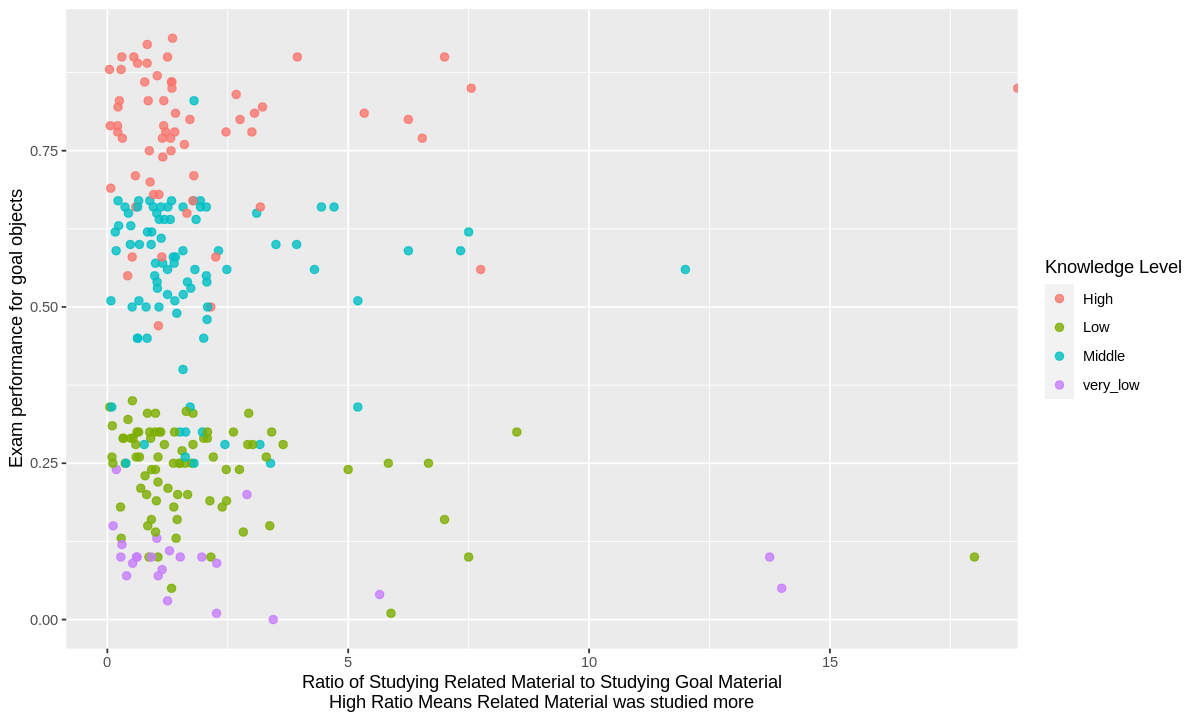

In [103]:
options(repr.plot.width=10, repr.plot.height=6)
ratio_lprpeg_plot

This graph shows that studying more for related exam than the goal exam did not influence the result on the goal exam. 

### Methods

Textbox

### Expected Outcomes and Significance

Textbox